In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import random
import pymc3 as pm
import theano.tensor as T
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('ggplot')

In [13]:
num_obs = 1000
num_features = 10
alpha = random.normal(size = 1)
betas=  random.normal(size = num_features)
print(alpha)
# fake data
data =  random.normal(size = (num_obs,num_features))
#np.savetxt("foo.csv", data, delimiter=",")

[-0.28295836]


In [14]:
### y = alpha + b*data + noise

y_real = alpha + np.sum(betas*data,axis=1) + random.normal(size=1000)
y_real.shape

(1000,)

In [21]:
data_df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,y
0,0.229026,-1.676483,-0.397624,0.141532,0.475118,0.675019,-0.722861,0.622794,0.690197,-0.132233,1.273970
1,-0.821977,-0.258887,0.349347,0.426681,-1.725152,0.243961,2.107400,-2.108291,0.370749,-0.827215,-8.518234
2,-0.502637,-0.623811,-1.183478,0.293438,0.676620,0.519555,0.526499,0.161621,-0.865306,-1.497962,0.936447
3,-0.377339,-0.999545,1.031415,1.398644,0.700998,0.360807,0.677670,0.907889,1.211729,0.673783,0.532657
4,0.232678,1.207441,0.972816,-2.365423,-0.648823,0.700116,0.564812,0.253316,2.048213,-0.902733,1.082276


In [22]:
col_name = ['f'+str(x) for x in range(10)]
data_df = pd.DataFrame(data,columns=col_name)
data_df['y'] = y_real
data_df.to_csv("linear_reg_data.csv",index=False)

In [55]:
with pm.Model() as model:
    
    
    alpha = pm.Normal('alpha', tau=.01,shape=(1))
    betas = pm.Normal('betas', tau=.01, shape = (1,num_features))
    
    s = pm.HalfNormal('s',tau=1)
    mu = alpha + T.dot(betas,data.T)
    temp = pm.Normal('temp',mu=mu , tau= s**-2, observed = y_real)
    
    step = pm.NUTS()
    trace = pm.sample(2500,step=step)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [s, betas, alpha]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:52<00:00, 114.35draws/s]


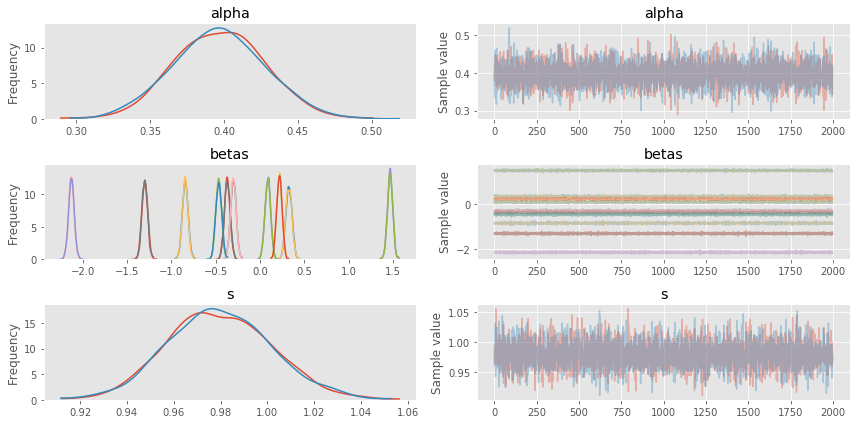

In [62]:
pm.traceplot(trace[500:]);

In [63]:
pm.summary(trace[500:])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha__0,0.396381,0.030685,0.000351,0.332242,0.451156,7116.173539,0.999787
betas__0_0,-0.369570,0.031810,0.000385,-0.437701,-0.312312,7027.670198,0.999927
betas__0_1,0.325793,0.033925,0.000361,0.263741,0.394720,7682.402717,0.999897
betas__0_2,0.087424,0.031118,0.000384,0.026912,0.148910,6981.958808,0.999828
betas__0_3,-0.301593,0.031397,0.000380,-0.361278,-0.237138,6853.283466,0.999834
betas__0_4,0.218707,0.029965,0.000345,0.156903,0.273209,6821.796736,0.999757
betas__0_5,-0.466979,0.031817,0.000351,-0.529822,-0.406928,7077.467598,0.999750
betas__0_6,-2.130572,0.031144,0.000406,-2.192523,-2.070858,6635.849821,0.999750
betas__0_7,-1.301912,0.031715,0.000381,-1.364918,-1.240828,6738.459334,0.999787
betas__0_8,-0.845316,0.031986,0.000373,-0.908399,-0.781942,6236.863787,0.999986


In [93]:
size=100
x = np.linspace(0,1,size)
true_slope = 5
true_intercept = 1
true_reg_line = true_slope*x + true_intercept
y  =  true_reg_line+ random.normal(scale=0.5,size=size)

# add oulier
x_out = np.append(x,[.1,.15,.2])
y_out = np.append(y,[8,6,9])

data = dict(x=x_out,y=y_out)
#print(data)

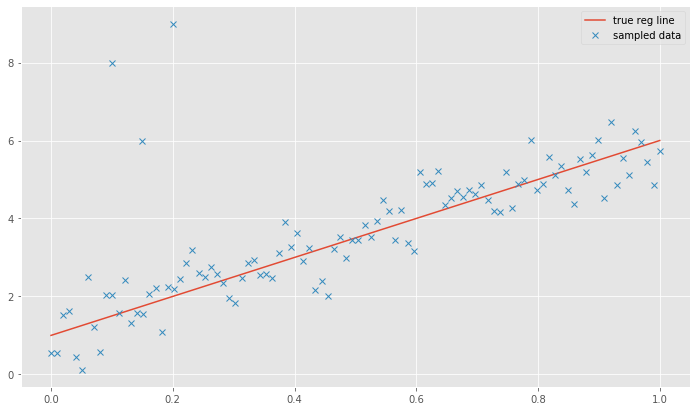

In [94]:
plt.plot(x,true_reg_line,label="true reg line")
plt.plot(x_out,y_out,'x',label="sampled data")
plt.legend()

In [95]:
with pm.Model() as model:
    pm.glm.GLM.from_formula('y~x',data)
    trace = pm.sample(3000)

INFO (theano.gof.compilelock): Refreshing lock /home/quantiphi/.theano/compiledir_Linux-4.15--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.7-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]
Sampling 2 chains: 100%|██████████| 7000/7000 [00:07<00:00, 900.97draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69697d7ba8>,
      dtype=object)

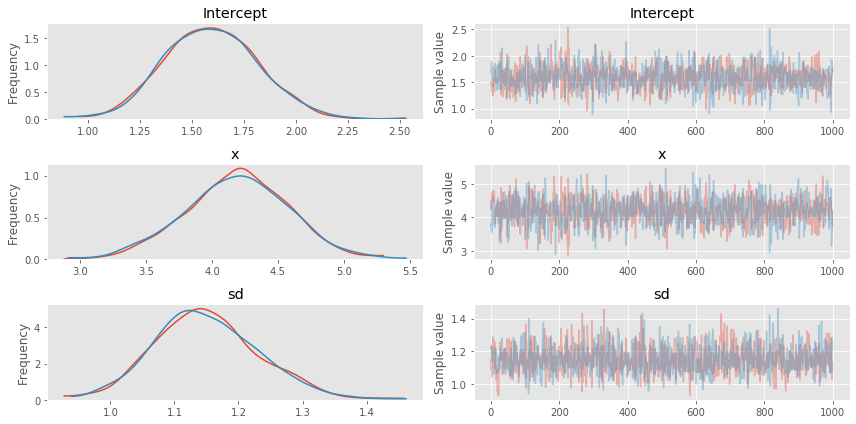

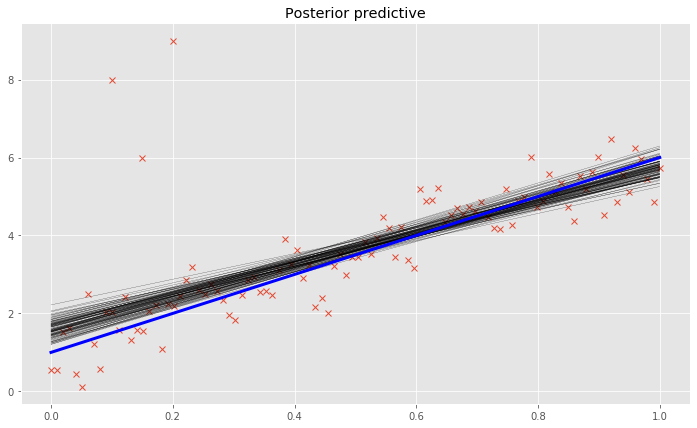

In [102]:
plt.plot(x_out,y_out,'x')
pm.plot_posterior_predictive_glm(trace, samples=100,
                                 label='posterior predictive regression lines')
plt.plot(x, true_reg_line,
         label='true regression line', lw=3., c='b')

In [117]:
normal_dist = pm.Normal.dist(mu=0,sd=1)
student_t = pm.StudentT.dist(mu=0,lam=1,nu=1)
x_eval = np.linspace(-8,8,300)

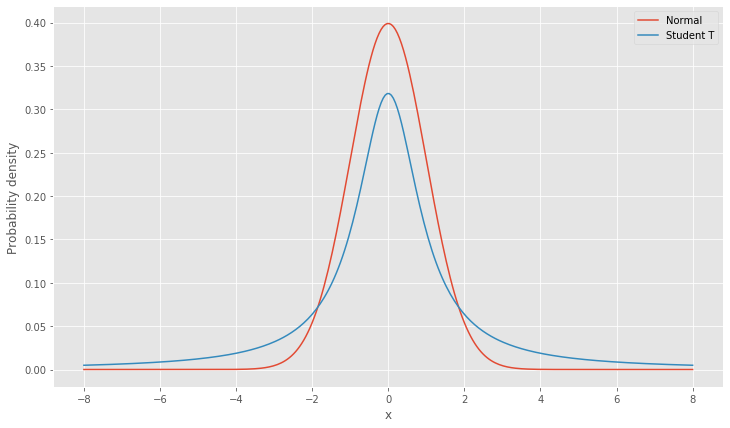

In [119]:

plt.plot(x_eval,T.exp(normal_dist.logp(x_eval)).eval(),label = "Normal")
plt.plot(x_eval,T.exp(student_t.logp(x_eval)).eval(),label="Student T")
plt.xlabel('x')
plt.ylabel('Probability density')
plt.legend()

In [125]:

with pm.Model() as model:
    studentT = pm.glm.families.StudentT()
    pm.glm.GLM.from_formula('y~x',data=data,family=studentT)
    trace1 = pm.sample(3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [lam, x, Intercept]
Sampling 2 chains: 100%|██████████| 7000/7000 [00:09<00:00, 762.20draws/s]
The acceptance probability does not match the target. It is 0.8884484347443694, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69d44ca080>,
      dtype=object)

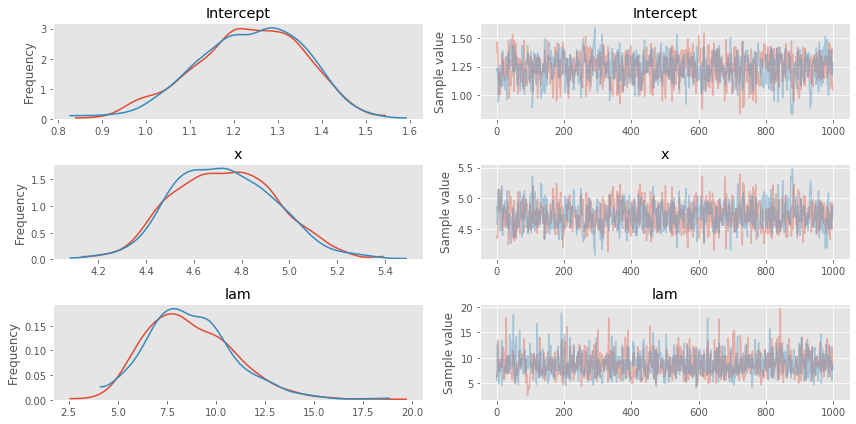

In [126]:
pm.traceplot(trace1[:1000])


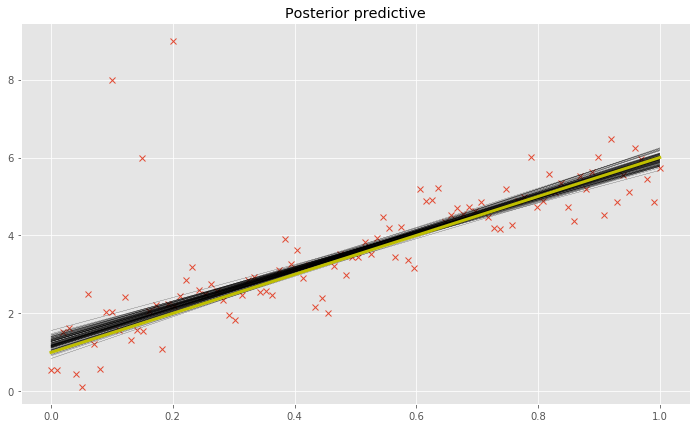

In [127]:
plt.plot(x_out,y_out,'x')
pm.plot_posterior_predictive_glm(trace1, samples=100,
                                 label='posterior predictive regression lines')
plt.plot(x, true_reg_line,
         label='true regression line', lw=3., c='y')